In [1]:
import sys
import obspy
from obspy.imaging.beachball import beachball, beach
# from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import PIL
import cartopy.crs as ccrs
import cartopy.feature as cfeature

from dateutil import parser
from datetime import datetime, timezone

from sklearn.neighbors import KernelDensity
import seaborn as sns

#from obspy import read_inventory, read_events
import pandas as pd

from scipy import interpolate
from scipy.interpolate import interp1d

from scipy.interpolate import make_interp_spline
from scipy.integrate import * # "quad" function

%matplotlib inline

In [45]:
data = pd.read_csv('SUeq_data.csv', parse_dates=['DATE'])

slab_length = pd.read_csv('depth_at_prof_50.csv', sep = ',', header = 'infer')
slab_length=slab_length.append(slab_length, ignore_index=True)
slab_length = slab_length.sort_values(by = 'ALONG',ascending=True)
length = np.asarray(slab_length['LENGTH'])

In [47]:
print(data['DEPTH'].min())
print(data['DEPTH'].max())

3.8
645.2


### Upper plate

##### forearc

In [3]:
# forearc
data_100 = data[(data['P(km)'] < 200)]
data_UP = data_100.loc[data['CLASS'] == 'UPPER']

data_sum = data_UP
# data_sum = data_UP[(data_UP['LAT'] >= -6) & (data_UP['LAT'] <= 6)]

datafT = data_sum[(data_sum['TYPE'] == 'THRUST') | (data_sum['TYPE'] == 'O_THRUST')]
datafTb = datafT[(datafT['DATE'] > '25-12-1994') & (datafT['DATE'] < '25-12-2004')]
datafTa = datafT[(datafT['DATE'] > '25-12-2004') & (datafT['DATE'] < '25-12-2014')]

datafN = data_sum[(data_sum['TYPE'] == 'NORM')]
datafNb = datafN[(datafN['DATE'] > '25-12-1994') & (datafN['DATE'] < '25-12-2004')]
datafNa = datafN[(datafN['DATE'] > '25-12-2004') & (datafN['DATE'] < '25-12-2014')]

#Backarc
data_100 = data[(data['P(km)'] > 200)]
data_UP = data_100.loc[data['CLASS'] == 'UPPER']

data_sum = data_UP
# data_sum = data_UP[(data_UP['LAT'] >= -6) & (data_UP['LAT'] <= 6)]

databT = data_sum[(data_sum['TYPE'] == 'THRUST') | (data_sum['TYPE'] == 'O_THRUST')]
databTb = databT[(databT['DATE'] > '25-12-1994') & (databT['DATE'] < '25-12-2004')]
databTa = databT[(databT['DATE'] > '25-12-2004') & (databT['DATE'] < '25-12-2014')]

databN = data_sum[(data_sum['TYPE'] == 'NORM')]
databNb = databN[(databN['DATE'] > '25-12-1994') & (databN['DATE'] < '25-12-2004')]
databNa = databN[(databN['DATE'] > '25-12-2004') & (databN['DATE'] < '25-12-2014')]

In [4]:
##### Forearc ##############

#Thrust before
data_df = datafTb.sort_values(by = 'ALONG',ascending=True)
data_along_pos_fTb = pd.unique(data_df['ALONG'])
data_along_energy_fTb = []

grp = data_df.groupby('ALONG')

for pos in data_along_pos_fTb:
    to_proc = grp.get_group(pos) 
    exp = np.asarray(to_proc['EX'])
    mo = np.asarray(to_proc['MO'])
    energy = mo*np.power(10., exp)
    data_along_energy_fTb.append(np.sum(energy))
    
data_along_energy_fTb = np.asarray(data_along_energy_fTb)

# Thrust after
data_df = datafTa.sort_values(by = 'ALONG',ascending=True)
data_along_pos_fTa = pd.unique(data_df['ALONG'])
data_along_energy_fTa = []

grp = data_df.groupby('ALONG')

for pos in data_along_pos_fTa:
    to_proc = grp.get_group(pos) 
    exp = np.asarray(to_proc['EX'])
    mo = np.asarray(to_proc['MO'])
    energy = mo*np.power(10., exp)
    data_along_energy_fTa.append(np.sum(energy))
    
data_along_energy_fTa = np.asarray(data_along_energy_fTa)

########

#Normal before
data_df = datafNb.sort_values(by = 'ALONG',ascending=True)
data_along_pos_fNb = pd.unique(data_df['ALONG'])
data_along_energy_fNb = []

grp = data_df.groupby('ALONG')

for pos in data_along_pos_fNb:
    to_proc = grp.get_group(pos) 
    exp = np.asarray(to_proc['EX'])
    mo = np.asarray(to_proc['MO'])
    energy = mo*np.power(10., exp)
    data_along_energy_fNb.append(np.sum(energy))
    
data_along_energy_fNb = np.asarray(data_along_energy_fNb)

# Normal After
data_df = datafNa.sort_values(by = 'ALONG',ascending=True)
data_along_pos_fNa = pd.unique(data_df['ALONG'])
data_along_energy_fNa = []

grp = data_df.groupby('ALONG')

for pos in data_along_pos_fNa:
    to_proc = grp.get_group(pos) 
    exp = np.asarray(to_proc['EX'])
    mo = np.asarray(to_proc['MO'])
    energy = mo*np.power(10., exp)
    data_along_energy_fNa.append(np.sum(energy))
    
data_along_energy_fNa = np.asarray(data_along_energy_fNa)

##### Backarc

In [5]:
##### Backarc ##############

#Thrust before
data_df = databTb.sort_values(by = 'ALONG',ascending=True)
data_along_pos_bTb = pd.unique(data_df['ALONG'])
data_along_energy_bTb = []

grp = data_df.groupby('ALONG')

for pos in data_along_pos_bTb:
    to_proc = grp.get_group(pos) 
    exp = np.asarray(to_proc['EX'])
    mo = np.asarray(to_proc['MO'])
    energy = mo*np.power(10., exp)
    data_along_energy_bTb.append(np.sum(energy))
    
data_along_energy_bTb = np.asarray(data_along_energy_bTb)

# Thrust after
data_df = databTa.sort_values(by = 'ALONG',ascending=True)
data_along_pos_bTa = pd.unique(data_df['ALONG'])
data_along_energy_bTa = []

grp = data_df.groupby('ALONG')

for pos in data_along_pos_bTa:
    to_proc = grp.get_group(pos) 
    exp = np.asarray(to_proc['EX'])
    mo = np.asarray(to_proc['MO'])
    energy = mo*np.power(10., exp)
    data_along_energy_bTa.append(np.sum(energy))
    
data_along_energy_bTa = np.asarray(data_along_energy_bTa)

########

#Normal before
data_df = databNb.sort_values(by = 'ALONG',ascending=True)
data_along_pos_bNb = pd.unique(data_df['ALONG'])
data_along_energy_bNb = []

grp = data_df.groupby('ALONG')

for pos in data_along_pos_bNb:
    to_proc = grp.get_group(pos) 
    exp = np.asarray(to_proc['EX'])
    mo = np.asarray(to_proc['MO'])
    energy = mo*np.power(10., exp)
    data_along_energy_bNb.append(np.sum(energy))
    
data_along_energy_bNb = np.asarray(data_along_energy_bNb)

# Normal After
data_df = databNa.sort_values(by = 'ALONG',ascending=True)
data_along_pos_bNa = pd.unique(data_df['ALONG'])
data_along_energy_bNa = []

grp = data_df.groupby('ALONG')

for pos in data_along_pos_bNa:
    to_proc = grp.get_group(pos) 
    exp = np.asarray(to_proc['EX'])
    mo = np.asarray(to_proc['MO'])
    energy = mo*np.power(10., exp)
    data_along_energy_bNa.append(np.sum(energy))
    
data_along_energy_bNa = np.asarray(data_along_energy_bNa)

##### forebulge

In [6]:
######## Forebulge ################

data_dw = data.loc[data['CLASS'] == 'DGOING']
data_dw = data_dw[(data_dw['P(km)'] < 0)]

data_sum = data_dw
# data_sum = data_UP[(data_UP['LAT'] >= -6) & (data_UP['LAT'] <= 6)]

dataforT = data_sum[(data_sum['TYPE'] == 'THRUST') | (data_sum['TYPE'] == 'O_THRUST')]
dataforTb = dataforT[(dataforT['DATE'] > '25-12-1994') & (dataforT['DATE'] < '25-12-2004')]
dataforTa = dataforT[(dataforT['DATE'] > '25-12-2004') & (dataforT['DATE'] < '25-12-2014')]

dataforN = data_sum[(data_sum['TYPE'] == 'NORM')]
dataforNb = dataforN[(dataforN['DATE'] > '25-12-1994') & (dataforN['DATE'] < '25-12-2004')]
dataforNa = dataforN[(dataforN['DATE'] > '25-12-2004') & (dataforN['DATE'] < '25-12-2014')]


#Thrust before
data_df = dataforTb.sort_values(by = 'ALONG',ascending=True)
data_along_pos_forTb = pd.unique(data_df['ALONG'])
data_along_energy_forTb = []

grp = data_df.groupby('ALONG')

for pos in data_along_pos_forTb:
    to_proc = grp.get_group(pos) 
    exp = np.asarray(to_proc['EX'])
    mo = np.asarray(to_proc['MO'])
    energy = mo*np.power(10., exp)
    data_along_energy_forTb.append(np.sum(energy))
    
data_along_energy_forTb = np.asarray(data_along_energy_forTb)

# Thrust after
data_df = dataforTa.sort_values(by = 'ALONG',ascending=True)
data_along_pos_forTa = pd.unique(data_df['ALONG'])
data_along_energy_forTa = []

grp = data_df.groupby('ALONG')

for pos in data_along_pos_forTa:
    to_proc = grp.get_group(pos) 
    exp = np.asarray(to_proc['EX'])
    mo = np.asarray(to_proc['MO'])
    energy = mo*np.power(10., exp)
    data_along_energy_forTa.append(np.sum(energy))
    
data_along_energy_forTa = np.asarray(data_along_energy_forTa)

########

#Normal before
data_df = dataforNb.sort_values(by = 'ALONG',ascending=True)
data_along_pos_forNb = pd.unique(data_df['ALONG'])
data_along_energy_forNb = []

grp = data_df.groupby('ALONG')

for pos in data_along_pos_forNb:
    to_proc = grp.get_group(pos) 
    exp = np.asarray(to_proc['EX'])
    mo = np.asarray(to_proc['MO'])
    energy = mo*np.power(10., exp)
    data_along_energy_forNb.append(np.sum(energy))
    
data_along_energy_forNb = np.asarray(data_along_energy_forNb)

# Normal After
data_df = dataforNa.sort_values(by = 'ALONG',ascending=True)
data_along_pos_forNa = pd.unique(data_df['ALONG'])
data_along_energy_forNa = []

grp = data_df.groupby('ALONG')

for pos in data_along_pos_forNa:
    to_proc = grp.get_group(pos) 
    exp = np.asarray(to_proc['EX'])
    mo = np.asarray(to_proc['MO'])
    energy = mo*np.power(10., exp)
    data_along_energy_forNa.append(np.sum(energy))
    
data_along_energy_forNa = np.asarray(data_along_energy_forNa)

/Users/mohd0001/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning: Saw kwargs ['lw', 'linewidth'] which are all aliases for 'linewidth'.  Kept value from 'linewidth'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
/Users/mohd0001/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: MatplotlibDeprecationWarning: Saw kwargs ['lw', 'linewidth'] which are all aliases for 'linewidth'.  Kept value from 'linewidth'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
/Users/mohd0001/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Saw kwargs ['lw', 'linewidth'] which are all aliases for 'linewidth'.  Kept value from 'linewidth'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
/Users/mohd0001/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:48: MatplotlibDeprecationWarning: Saw kwa

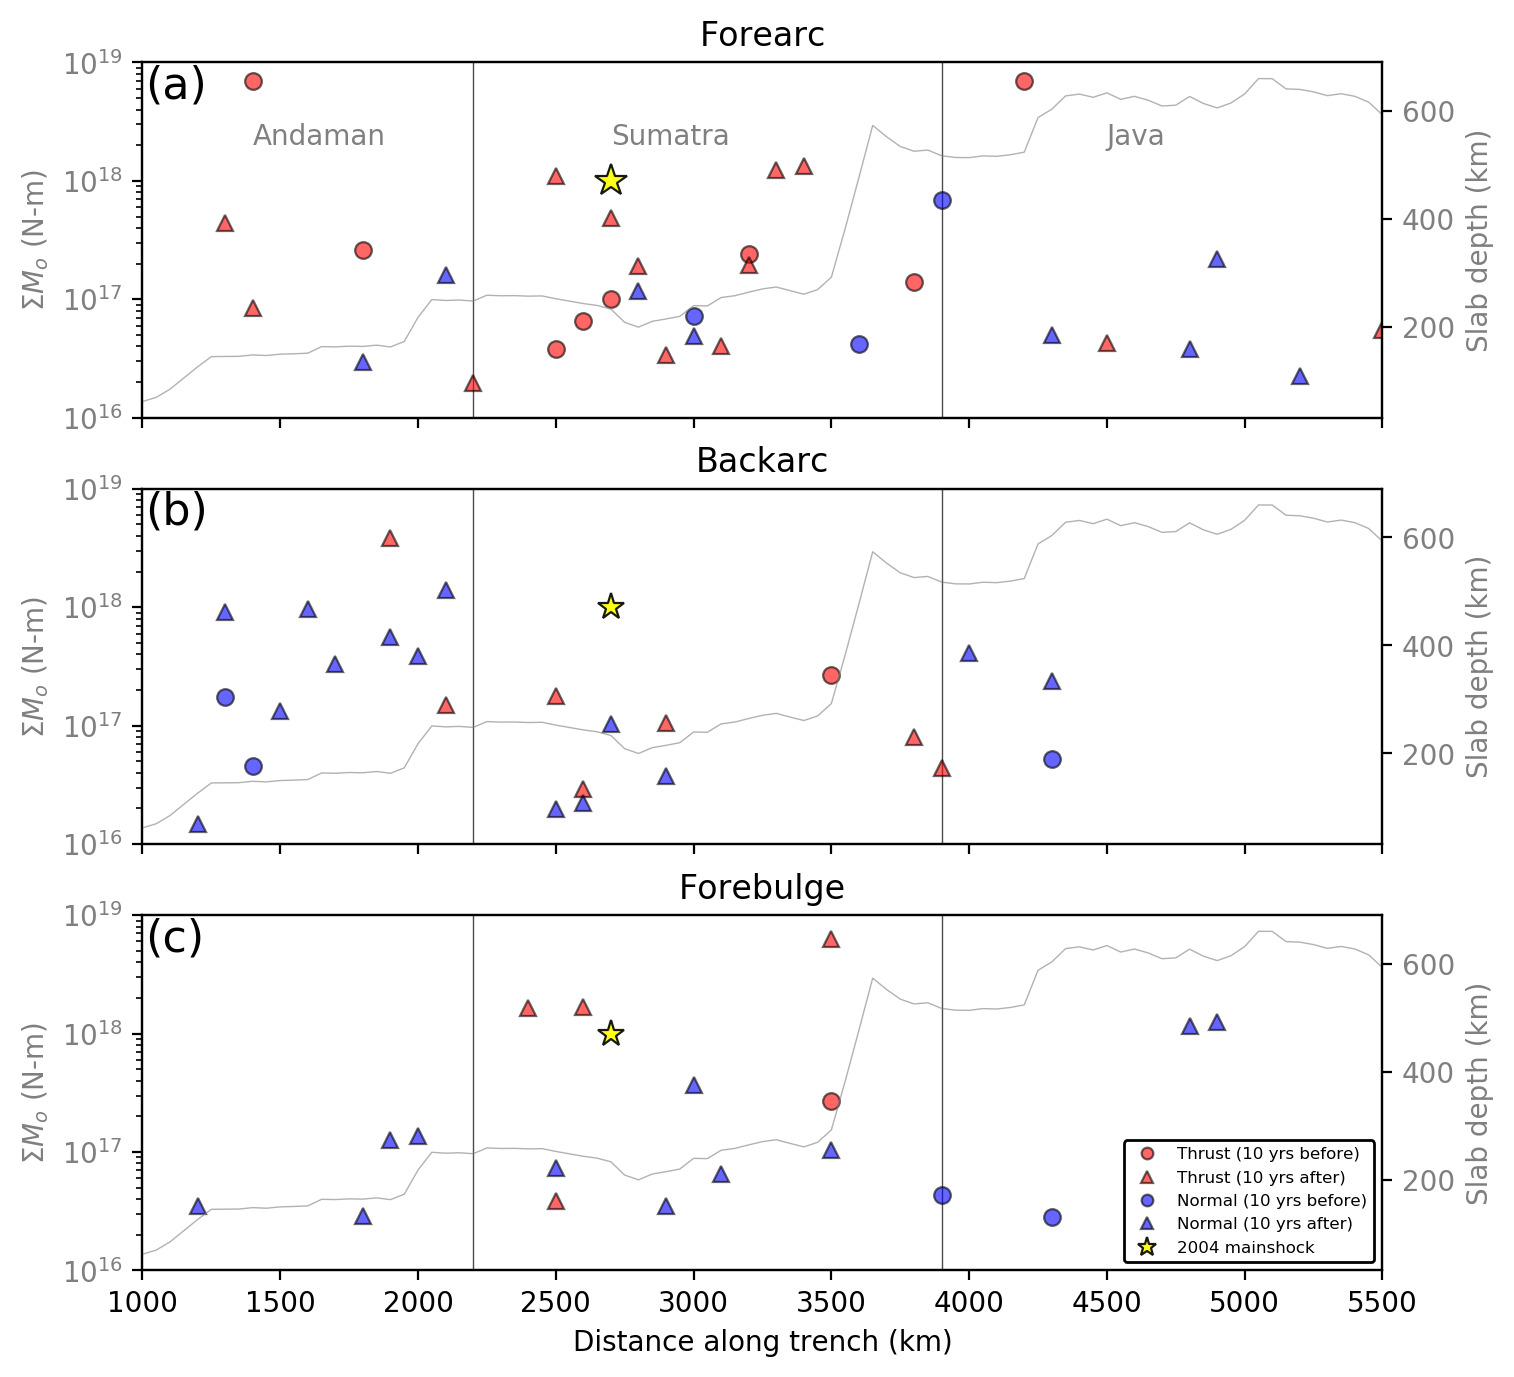

In [7]:
width = 100

figsize = (8,8)

fig, ax = plt.subplots(3, 1, dpi = 200, sharex= True, figsize=figsize)

### forearc plot #######
fig1=ax[0]
color = 'tab:gray'
# fig1.set_xlabel('Distance along trench (km)')
fig1.set_ylabel(r'$\Sigma$$M_o$ (N-m)', color=color)  # we already handled the x-label with ax1
fig1.set_title('Forearc', fontsize=12)


fig1.axvline(x=2200, color="black", lw=0.5, ls='-', alpha=0.7)
fig1.axvline(x=3900, color="black", lw=0.5, ls='-', alpha=0.7)

fig1.plot(data_along_pos_fTb, data_along_energy_fTb, 'o',
                markersize = 6,
                linewidth=2,
                color = 'k',
                alpha=0.6,
                label='Thrust 10 yrs before 2004 mainshock',
         mfc = 'red', mew = 0.8, lw = 0.8)

fig1.plot(data_along_pos_fTa, data_along_energy_fTa, "^",
                markersize = 6,
                linewidth=2,
                color = 'k',
                alpha=0.6, label='Thrust 10 yrs after 2004 mainshock',
         mfc = 'red', mew = 0.8, lw = 0.8)


fig1.plot(data_along_pos_fNb, data_along_energy_fNb, 'o',
                markersize = 6,
                linewidth=2,
                color = 'k',
                alpha=0.6,
                label='Normal 10 yrs before 2004 mainshocks',
         mfc = 'blue', mew = 0.8, lw = 0.8)

fig1.plot(data_along_pos_fNa, data_along_energy_fNa, "^",
                markersize = 6,
                linewidth=2,
                color = 'k',
                alpha=0.6,
                label='Normal 10 yrs after 2004 mainshock',
         mfc = 'blue', mew = 0.8, lw = 0.8)

fig1.plot(2700, 1e18, "*",
                markersize = 12,
                linewidth=2,
                color = 'k',
                alpha=0.9,
                label='2004 mainshock',
         mfc = 'yellow', mew = 0.8, lw = 0.8)


fig1.set_yscale('log')

fig1.tick_params(axis='y', labelcolor=color)

fig1.set_yscale('log')
fig1.set_ylim([1e16, 1e19])
fig1.set_xlim([1000, 5500])
# fig1.legend(loc='upper left', fontsize=6)


ax2 = fig1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:gray'
ax2.set_ylabel('Slab depth (km)', color=color)
ax2.plot(slab_length['ALONG'], slab_length['LENGTH']*-1, '-', color=color,
         alpha = 0.6, markersize = 1, linewidth = 0.5)
ax2.tick_params(axis='y', labelcolor=color)

fig1.text(1010, 5e18, '(a)', 
         fontsize = 16, color = 'k')

fig1.text(1400, 2e18, 'Andaman', 
         fontsize = 10, color = 'gray')
fig1.text(2700, 2e18, 'Sumatra', 
         fontsize = 10, color = 'gray')
fig1.text(4500, 2e18, 'Java', 
         fontsize = 10, color = 'gray')

##### Backarc plot #############

fig2=ax[1]
color = 'tab:gray'
# fig2.set_xlabel('Distance along trench (km)')
fig2.set_ylabel(r'$\Sigma$$M_o$ (N-m)', color=color)  # we already handled the x-label with ax1
fig2.set_title('Backarc', fontsize=12)

fig2.axvline(x=2200, color="black", lw=0.5, ls='-', alpha=0.7)
fig2.axvline(x=3900, color="black", lw=0.5, ls='-', alpha=0.7)

fig2.plot(data_along_pos_forTb, data_along_energy_forTb, 'o',
                markersize = 6,
                linewidth=2,
                color = 'k',
                alpha=0.6,
                label='Thrust (10 yrs before)',
         mfc = 'red', mew = 0.8, lw = 0.8)

fig2.plot(data_along_pos_bTa, data_along_energy_bTa, "^",
                markersize = 6,
                linewidth=2,
                color = 'k',
                alpha=0.6, label='Thrust (10 yrs after)',
         mfc = 'red', mew = 0.8, lw = 0.8)


fig2.plot(data_along_pos_bNb, data_along_energy_bNb, 'o',
                markersize = 6,
                linewidth=2,
                color = 'k',
                alpha=0.6,
                label='Normal (10 yrs before)',
         mfc = 'blue', mew = 0.8, lw = 0.8)

fig2.plot(data_along_pos_bNa, data_along_energy_bNa, "^",
                markersize = 6,
                linewidth=2,
                color = 'k',
                alpha=0.6,
                label='Normal (10 yrs after)',
         mfc = 'blue', mew = 0.8, lw = 0.8)

fig2.plot(2700, 1e18, "*",
                markersize = 10,
                linewidth=2,
                color = 'k',
                alpha=0.9,
                label='2004 mainshock',
         mfc = 'yellow', mew = 0.8, lw = 0.8)

fig2.set_yscale('log')

fig2.tick_params(axis='y', labelcolor=color)

fig2.set_yscale('log')
fig2.set_ylim([1e16, 1e19])
fig2.set_xlim([1000, 5500])
# fig2.legend(loc='lower right',
#             fontsize=6,
#             facecolor="white",
#             edgecolor="black",
#             framealpha=1,
#             markerscale=0.7)


ax2 = fig2.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:gray'
ax2.set_ylabel('Slab depth (km)', color=color)
ax2.plot(slab_length['ALONG'], slab_length['LENGTH']*-1, '-', color=color,
         alpha = 0.6, markersize = 1, linewidth = 0.5)
ax2.tick_params(axis='y', labelcolor=color)

fig2.text(1010, 5e18, '(b)', 
         fontsize = 16, color = 'k')

############################################

# forebulge

fig3=ax[2]
color = 'tab:gray'
fig3.set_xlabel('Distance along trench (km)')
fig3.set_ylabel(r'$\Sigma$$M_o$ (N-m)', color=color)  # we already handled the x-label with ax1
fig3.set_title('Forebulge', fontsize=12)

fig3.axvline(x=2200, color="black", lw=0.5, ls='-', alpha=0.7)
fig3.axvline(x=3900, color="black", lw=0.5, ls='-', alpha=0.7)

fig3.plot(data_along_pos_forTb, data_along_energy_forTb, 'o',
                markersize = 6,
                linewidth=2,
                color = 'k',
                alpha=0.6,
                label='Thrust (10 yrs before)',
         mfc = 'red', mew = 0.8, lw = 0.8)

fig3.plot(data_along_pos_forTa, data_along_energy_forTa, "^",
                markersize = 6,
                linewidth=2,
                color = 'k',
                alpha=0.6, label='Thrust (10 yrs after)',
         mfc = 'red', mew = 0.8, lw = 0.8)


fig3.plot(data_along_pos_forNb, data_along_energy_forNb, 'o',
                markersize = 6,
                linewidth=2,
                color = 'k',
                alpha=0.6,
                label='Normal (10 yrs before)',
         mfc = 'blue', mew = 0.8, lw = 0.8)

fig3.plot(data_along_pos_forNa, data_along_energy_forNa, "^",
                markersize = 6,
                linewidth=2,
                color = 'k',
                alpha=0.6,
                label='Normal (10 yrs after)',
         mfc = 'blue', mew = 0.8, lw = 0.8)

fig3.plot(2700, 1e18, "*",
                markersize = 10,
                linewidth=2,
                color = 'k',
                alpha=0.9,
                label='2004 mainshock',
         mfc = 'yellow', mew = 0.8, lw = 0.8)

fig3.set_yscale('log')

fig3.tick_params(axis='y', labelcolor=color)

fig3.set_yscale('log')
fig3.set_ylim([1e16, 1e19])
fig3.set_xlim([1000, 5500])
fig3.legend(loc='lower right',
            fontsize=6,
            facecolor="white",
            edgecolor="black",
            framealpha=1,
            markerscale=0.7)


ax2 = fig3.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:gray'
ax2.set_ylabel('Slab depth (km)', color=color)
ax2.plot(slab_length['ALONG'], slab_length['LENGTH']*-1, '-', color=color,
         alpha = 0.6, markersize = 1, linewidth = 0.5)
ax2.tick_params(axis='y', labelcolor=color)

fig3.text(1010, 5e18, '(c)', 
         fontsize = 16, color = 'k')

plt.savefig('Correlation_Mo_slab.jpg', dpi = 300, transparent= True, bbox_inches='tight')

### Downgoing slab

In [36]:
######## inside the slab ################

data_dw = data.loc[data['CLASS'] == 'DGOING']
data_dw = data_dw[(data_dw['P(km)'] > 0)]
data_dw = data_dw[(data_dw['DEPTH'] > 50) & (data_dw['DEPTH'] < 200)]
print(data_dw['DEPTH'].max())


data_sum = data_dw
# data_sum = data_UP[(data_UP['LAT'] >= -6) & (data_UP['LAT'] <= 6)]

dataforT = data_sum[(data_sum['TYPE'] == 'THRUST')]
dataforTb = dataforT[(dataforT['DATE'] > '25-12-2003') & (dataforT['DATE'] < '25-12-2004')]
dataforTa = dataforT[(dataforT['DATE'] > '25-12-2004') & (dataforT['DATE'] < '25-12-2005')]

dataforN = data_sum[(data_sum['TYPE'] == 'NORM')]
dataforNb = dataforN[(dataforN['DATE'] > '25-12-2003') & (dataforN['DATE'] < '25-12-2004')]
dataforNa = dataforN[(dataforN['DATE'] > '25-12-2004') & (dataforN['DATE'] < '25-12-2005')]

dataS = data_sum[(data_sum['TYPE'] == 'SS')]
dataSb = dataS[(dataS['DATE'] > '25-12-2003') & (dataS['DATE'] < '25-12-2004')]
dataSa = dataS[(dataS['DATE'] > '25-12-2004') & (dataS['DATE'] < '25-12-2005')]


#Thrust before
data_df = dataforTb.sort_values(by = 'ALONG',ascending=True)
data_along_pos_forTb = pd.unique(data_df['ALONG'])
data_along_energy_forTb = []

grp = data_df.groupby('ALONG')

for pos in data_along_pos_forTb:
    to_proc = grp.get_group(pos) 
    exp = np.asarray(to_proc['EX'])
    mo = np.asarray(to_proc['MO'])
    energy = mo*np.power(10., exp)
    data_along_energy_forTb.append(np.sum(energy))
    
data_along_energy_forTb = np.asarray(data_along_energy_forTb)

# Thrust aforTer
data_df = dataforTa.sort_values(by = 'ALONG',ascending=True)
data_along_pos_forTa = pd.unique(data_df['ALONG'])
data_along_energy_forTa = []

grp = data_df.groupby('ALONG')

for pos in data_along_pos_forTa:
    to_proc = grp.get_group(pos) 
    exp = np.asarray(to_proc['EX'])
    mo = np.asarray(to_proc['MO'])
    energy = mo*np.power(10., exp)
    data_along_energy_forTa.append(np.sum(energy))
    
data_along_energy_forTa = np.asarray(data_along_energy_forTa)

########

#Normal before
data_df = dataforNb.sort_values(by = 'ALONG',ascending=True)
data_along_pos_forNb = pd.unique(data_df['ALONG'])
data_along_energy_forNb = []

grp = data_df.groupby('ALONG')

for pos in data_along_pos_forNb:
    to_proc = grp.get_group(pos) 
    exp = np.asarray(to_proc['EX'])
    mo = np.asarray(to_proc['MO'])
    energy = mo*np.power(10., exp)
    data_along_energy_forNb.append(np.sum(energy))
    
data_along_energy_forNb = np.asarray(data_along_energy_forNb)

# Normal After
data_df = dataforNa.sort_values(by = 'ALONG',ascending=True)
data_along_pos_forNa = pd.unique(data_df['ALONG'])
data_along_energy_forNa = []

grp = data_df.groupby('ALONG')

for pos in data_along_pos_forNa:
    to_proc = grp.get_group(pos) 
    exp = np.asarray(to_proc['EX'])
    mo = np.asarray(to_proc['MO'])
    energy = mo*np.power(10., exp)
    data_along_energy_forNa.append(np.sum(energy))
    
data_along_energy_forNa = np.asarray(data_along_energy_forNa)

####################

#strikeslip before
data_df = dataSb.sort_values(by = 'ALONG',ascending=True)
data_along_pos_Sb = pd.unique(data_df['ALONG'])
data_along_energy_Sb = []

grp = data_df.groupby('ALONG')

for pos in data_along_pos_Sb:
    to_proc = grp.get_group(pos) 
    exp = np.asarray(to_proc['EX'])
    mo = np.asarray(to_proc['MO'])
    energy = mo*np.power(10., exp)
    data_along_energy_Sb.append(np.sum(energy))
    
data_along_energy_Sb = np.asarray(data_along_energy_Sb)

# strikeslip After
data_df = dataSa.sort_values(by = 'ALONG',ascending=True)
data_along_pos_Sa = pd.unique(data_df['ALONG'])
data_along_energy_Sa = []

grp = data_df.groupby('ALONG')

for pos in data_along_pos_Sa:
    to_proc = grp.get_group(pos) 
    exp = np.asarray(to_proc['EX'])
    mo = np.asarray(to_proc['MO'])
    energy = mo*np.power(10., exp)
    data_along_energy_Sa.append(np.sum(energy))
    
data_along_energy_Sa = np.asarray(data_along_energy_Sa)

99.9


/Users/mohd0001/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Saw kwargs ['lw', 'linewidth'] which are all aliases for 'linewidth'.  Kept value from 'linewidth'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
/Users/mohd0001/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: MatplotlibDeprecationWarning: Saw kwargs ['lw', 'linewidth'] which are all aliases for 'linewidth'.  Kept value from 'linewidth'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
/Users/mohd0001/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: MatplotlibDeprecationWarning: Saw kwargs ['lw', 'linewidth'] which are all aliases for 'linewidth'.  Kept value from 'linewidth'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
/Users/mohd0001/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:42: MatplotlibDeprecationWarning: Saw kwa

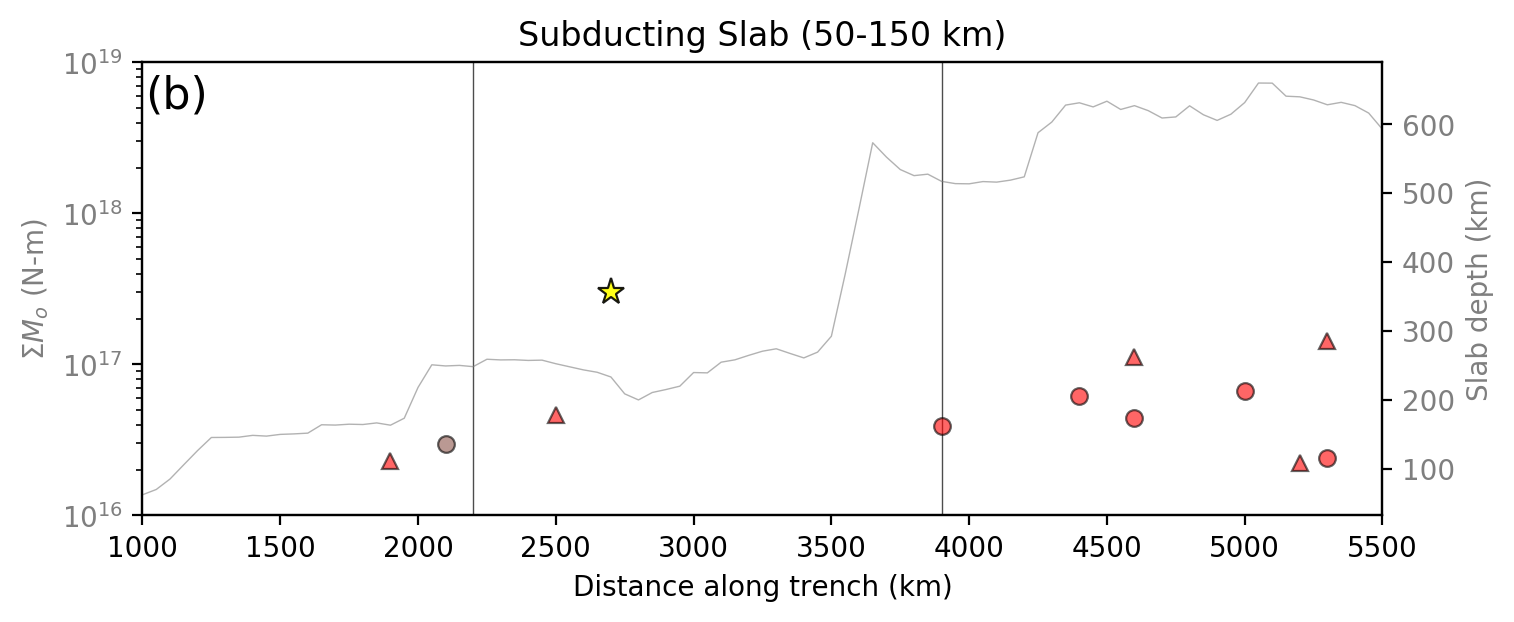

In [43]:
fig, ax = plt.subplots(1, dpi=200, figsize=(8,3))

fig3=ax
color = 'tab:gray'
fig3.set_xlabel('Distance along trench (km)')
fig3.set_ylabel(r'$\Sigma$$M_o$ (N-m)', color=color)  # we already handled the x-label with ax1
fig3.set_title('Subducting Slab (50-150 km)', fontsize=12)

fig3.axvline(x=2200, color="black", lw=0.5, ls='-', alpha=0.7)
fig3.axvline(x=3900, color="black", lw=0.5, ls='-', alpha=0.7)

fig3.plot(data_along_pos_forTb, data_along_energy_forTb, 'o',
                markersize = 6,
                linewidth=2,
                color = 'k',
                alpha=0.6,
                label='Thrust (1 yr before)',
         mfc = 'red', mew = 0.8, lw = 0.8)

fig3.plot(data_along_pos_forTa, data_along_energy_forTa, "^",
                markersize = 6,
                linewidth=2,
                color = 'k',
                alpha=0.6, label='Thrust (1 yr after)',
         mfc = 'red', mew = 0.8, lw = 0.8)


fig3.plot(data_along_pos_forNb, data_along_energy_forNb, 'o',
                markersize = 6,
                linewidth=2,
                color = 'k',
                alpha=0.6,
                label='Normal (1 yr before)',
         mfc = 'blue', mew = 0.8, lw = 0.8)

fig3.plot(data_along_pos_forNa, data_along_energy_forNa, "^",
                markersize = 6,
                linewidth=2,
                color = 'k',
                alpha=0.6,
                label='Normal (1 yr after)',
         mfc = 'blue', mew = 0.8, lw = 0.8)


fig3.plot(data_along_pos_Sb, data_along_energy_Sb, "o",
                markersize = 6,
                linewidth=2,
                color = 'k',
                alpha=0.6,
                label='Strike-slip (1 yr before)',
         mfc = 'tab:brown', mew = 0.8, lw = 0.8)

fig3.plot(data_along_pos_Sa, data_along_energy_Sa, "^",
                markersize = 6,
                linewidth=2,
                color = 'k',
                alpha=0.6,
                label='Normal (1 yr after)',
         mfc = 'tab:brown', mew = 0.8, lw = 0.8)


fig3.plot(2700, 3e17, "*",
                markersize = 10,
                linewidth=2,
                color = 'k',
                alpha=0.9,
                label='2004 mainshock',
         mfc = 'yellow', mew = 0.8, lw = 0.8)

fig3.set_yscale('log')

fig3.tick_params(axis='y', labelcolor=color)

fig3.set_yscale('log')
fig3.set_ylim([1e16, 1e19])
fig3.set_xlim([1000, 5500])
# fig3.legend(loc='upper right',
#             fontsize=6,
#             facecolor="white",
#             edgecolor="black",
#             framealpha=1,
#             markerscale=0.7)


ax2 = fig3.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:gray'
ax2.set_ylabel('Slab depth (km)', color=color)
ax2.plot(slab_length['ALONG'], slab_length['LENGTH']*-1, '-', color=color,
         alpha = 0.6, markersize = 1, linewidth = 0.5)
ax2.tick_params(axis='y', labelcolor=color)

fig3.text(1010, 5e18, '(b)', 
         fontsize = 16, color = 'k')

plt.savefig('slab50_150km.jpg', dpi = 600, transparent= True, bbox_inches='tight')

In [44]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ai/zuhair-alig31/sumatra-correlation-mo-slab


'https://jovian.ai/zuhair-alig31/sumatra-correlation-mo-slab'